In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno 
df = pd.read_csv("data.csv", skiprows = 41)
df.head(5)

,FID,file_id,deployment_name,platform_type,platform_code,time_coverage_start,time_coverage_end,TIME,TIME_quality_control,LATITUDE,...,VCUR_GPS_quality_control,IRRAD443,IRRAD443_quality_control,IRRAD490,IRRAD490_quality_control,IRRAD555,IRRAD555_quality_control,IRRAD670,IRRAD670_quality_control,geom
0,anfog_dm_trajectory_data.fid-7f408395_174917ab...,185,TwoRocks20130215,slocum glider,SL248,2013-02-15T03:13:29Z,2013-03-11T20:14:20Z,2013-03-06T22:18:19Z,1.0,-31.8027,...,9.0,0.2722,4.0,0.3541,4.0,0.0712,4.0,0.0114,4.0,POINT (114.98013440372972 -31.802694506260686)
1,anfog_dm_trajectory_data.fid-7f408395_174917ab...,185,TwoRocks20130215,slocum glider,SL248,2013-02-15T03:13:29Z,2013-03-11T20:14:20Z,2013-03-06T22:18:22Z,1.0,-31.8027,...,9.0,0.2642,4.0,0.3463,4.0,0.0675,4.0,0.0133,4.0,POINT (114.98013265657173 -31.802693721740056)
2,anfog_dm_trajectory_data.fid-7f408395_174917ab...,185,TwoRocks20130215,slocum glider,SL248,2013-02-15T03:13:29Z,2013-03-11T20:14:20Z,2013-03-06T22:18:23Z,1.0,-31.8027,...,9.0,0.2579,4.0,0.3398,4.0,0.0675,4.0,0.0128,4.0,POINT (114.98013155928385 -31.802693229028474)
3,anfog_dm_trajectory_data.fid-7f408395_174917ab...,185,TwoRocks20130215,slocum glider,SL248,2013-02-15T03:13:29Z,2013-03-11T20:14:20Z,2013-03-06T22:18:26Z,1.0,-31.8027,...,9.0,0.2579,4.0,0.3375,4.0,0.0666,4.0,0.0104,4.0,POINT (114.98012962223838 -31.802692359243295)
4,anfog_dm_trajectory_data.fid-7f408395_174917ab...,185,TwoRocks20130215,slocum glider,SL248,2013-02-15T03:13:29Z,2013-03-11T20:14:20Z,2013-03-06T22:18:28Z,1.0,-31.8027,...,9.0,0.2579,4.0,0.3375,4.0,0.0634,4.0,0.0104,4.0,POINT (114.9801285199303 -31.802691864277513)


In [2]:
df = df.drop(df[(df.PSAL < 2)].index)
df = df.drop(df[(df.PSAL > 41)].index)
#len(df)
df = df.drop(df[(df.CPHL < 0)].index)
df = df.drop(df[(df.CPHL > 100)].index)
#len(df)
df = df.drop(df[(df.CDOM < 0)].index)
df = df.drop(df[(df.CDOM > 400)].index)
#len(df)
df = df.drop(df[(df.VBSC < 0)].index)
df = df.drop(df[(df.VBSC > 0.1)].index)
#len(df)
df = df.drop(df[(df.IRRAD555 < 0) ].index)
df = df.drop(df[(df.IRRAD555 > 1000)].index)
len(df)

3101188

In [3]:
name=df.deployment_name.unique()
print(name)

['TwoRocks20130215' 'Leeuwin20131017' 'AIMS20151127'
 'LizardIsland20131024' 'SpencerGulf20131031' 'TwoRocks20140808'
 'StormBay20141017']


In [4]:
#delete invalid columns VCUR,UCUR and NTRA
St_14 = df[df['deployment_name'] == 'StormBay20141017']
print(df.isnull().sum())

FID                                0
file_id                            0
deployment_name                    0
platform_type                      0
platform_code                      1
time_coverage_start                1
time_coverage_end                  1
TIME                               1
TIME_quality_control               1
LATITUDE                        2077
LATITUDE_quality_control           1
LONGITUDE                       2077
LONGITUDE_quality_control          1
PRES                            6895
PRES_quality_control               1
DEPTH                           7687
DEPTH_quality_control              1
PROFILE                         1556
PROFILE_quality_control            1
PHASE                           7049
PHASE_quality_control              1
TEMP                            1410
TEMP_quality_control               1
PSAL                            7252
PSAL_quality_control               1
DOX1                          641383
DOX1_quality_control               1
D

In [5]:
del St_14['NTRA']
del St_14['UCUR']
del St_14['VCUR']
#find the unique value in PSAL_quality_control
psalQ = St_14.PSAL_quality_control.unique()
print(psalQ)
#keep good data only
psalValid=St_14.loc[df['PSAL_quality_control'] == 1.]
St_14.head(5)

[ 0.  9.  1.  3. nan]


,FID,file_id,deployment_name,platform_type,platform_code,time_coverage_start,time_coverage_end,TIME,TIME_quality_control,LATITUDE,...,VCUR_GPS_quality_control,IRRAD443,IRRAD443_quality_control,IRRAD490,IRRAD490_quality_control,IRRAD555,IRRAD555_quality_control,IRRAD670,IRRAD670_quality_control,geom
2941073,anfog_dm_trajectory_data.fid-7f408395_17491821...,190,StormBay20141017,slocum glider,SL286,2014-10-17T00:40:46Z,2014-11-06T22:18:12Z,2014-10-17T00:47:09Z,4.0,NaN,...,9.0,18.6694,1.0,42.5802,1.0,50.0341,1.0,3.9290,1.0,NaN
2941342,anfog_dm_trajectory_data.fid-7f408395_17491821...,190,StormBay20141017,slocum glider,SL286,2014-10-17T00:40:46Z,2014-11-06T22:18:12Z,2014-10-17T00:42:01Z,4.0,NaN,...,9.0,3.8766,4.0,10.0276,4.0,11.2014,4.0,0.4776,4.0,NaN
2941352,anfog_dm_trajectory_data.fid-7f408395_17491821...,190,StormBay20141017,slocum glider,SL286,2014-10-17T00:40:46Z,2014-11-06T22:18:12Z,2014-10-17T00:47:15Z,4.0,NaN,...,9.0,23.7052,1.0,49.2305,1.0,57.8834,1.0,6.6051,1.0,NaN
2941373,anfog_dm_trajectory_data.fid-7f408395_17491821...,190,StormBay20141017,slocum glider,SL286,2014-10-17T00:40:46Z,2014-11-06T22:18:12Z,2014-10-17T00:42:07Z,4.0,NaN,...,9.0,3.4595,4.0,9.3954,4.0,10.5480,4.0,0.3680,4.0,NaN
2941434,anfog_dm_trajectory_data.fid-7f408395_17491821...,190,StormBay20141017,slocum glider,SL286,2014-10-17T00:40:46Z,2014-11-06T22:18:12Z,2014-10-17T00:42:13Z,4.0,NaN,...,9.0,2.1014,4.0,5.9541,4.0,6.5387,4.0,0.1808,4.0,NaN


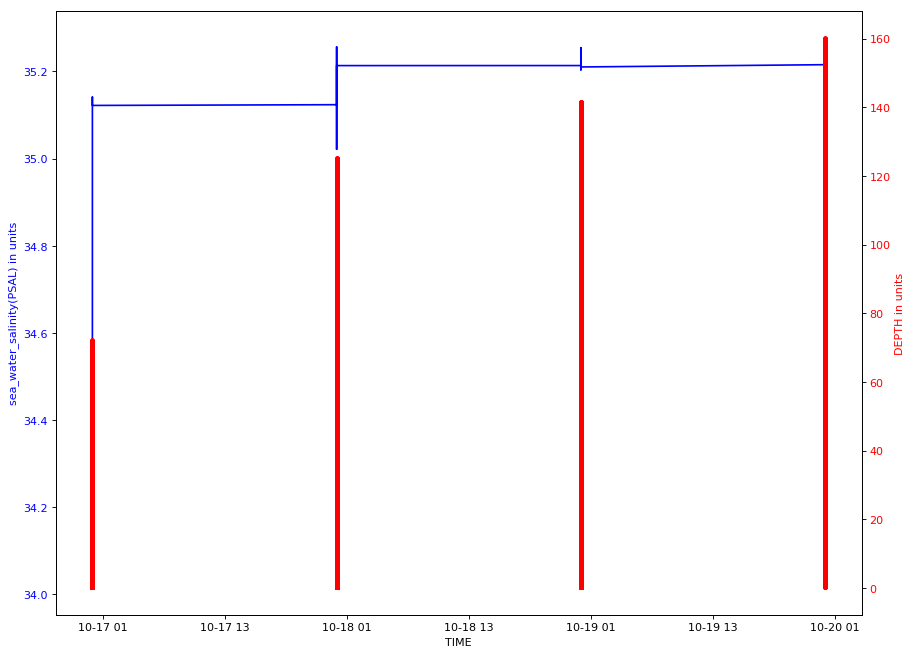

In [6]:
from numpy import where
from netCDF4 import Dataset, num2date
from matplotlib.pyplot import figure, xlabel, ylabel, title, show

# Extract variable values and convert the time values into an array of datetime objects
TIME = pd.to_datetime(St_14['TIME']).dt.date.values
psalData = St_14['PSAL'].values
depthData = St_14['DEPTH'].values
# plot depth and salinity(psal) timeseries
figure1 = figure( figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')

ax1 = figure1.add_subplot(111)
ax1.plot(TIME,psalData, 'b-')
ax1.set_xlabel('TIME')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('sea_water_salinity(PSAL)' + ' in units', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(TIME,depthData, 'r.')
ax2.set_ylabel('DEPTH' + ' in units', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

show()

In [7]:
#detective the not good of PSAL
#it turns out that there are only two items is missing value,so we decide to delete it
psalMissing=St_14.loc[df['PSAL_quality_control'] == 9.]
print("the num of missing psal for PSAL is",len(psalMissing))

#------update St_14-----#
St_14 = St_14.loc[df['PSAL_quality_control'] != 9.]

the num of missing psal for PSAL is 1


In [8]:
#### since type 0 is no-qc performed 3 is potentionally correct 
#### We will still keep those
####check the nan value
St_ps_missing = St_14[St_14['PSAL_quality_control'].isnull()]
print("nan data:",len(St_ps_missing))
print("the ratio of nan data v.s.valid data is",round(len(St_ps_missing)/(len(St_14) - len(St_ps_missing)),3))

###----- update the St_14-----####
St_14 = St_14[St_14['PSAL_quality_control'].notnull()]

nan data: 1
the ratio of nan data v.s.valid data is 0.0


In [9]:
#PROFILE:glider_trajectory_profile_number
proQ = St_14.PROFILE_quality_control.unique()
print("the type of profile data is:",proQ)
#We will leave the type 0: No QC performed still there
#then checking the pecentage of missing data
pro_missing=St_14.loc[df['PROFILE_quality_control'] == 9.]
print('the number of missing data for profile',len(pro_missing),', and the pecentage is',round(len(pro_missing)/len(St_14),4)*100,'%')
#there are only 4 missing of profile
# we wont include it in the data set 



### ------ update St_14---------#####
St_14 =St_14[(St_14['PROFILE_quality_control'] != 9.)]

the type of profile data is: [0. 9.]
the number of missing data for profile 14 , and the pecentage is 0.01 %


In [10]:
#DEPTH
depQ = St_14.DEPTH_quality_control.unique()
print("the type of depth data is:",depQ)
#We will leave the type 0: No QC performed still there
#then checking the pecentage of missing data
dep_missing=St_14.loc[df['DEPTH_quality_control'] == 9.]
print('the number of missing data for profile',len(dep_missing),', and the pecentage is',round(len(dep_missing)/len(St_14),4)*100,'%')
#there are only 4 missing of profile
# we wont include it in the data set 



### ------ update St_14---------#####
St_14 =St_14[(St_14['DEPTH_quality_control'] != 9.)]

the type of depth data is: [9. 1.]
the number of missing data for profile 220 , and the pecentage is 0.13999999999999999 %


the quality type of DOX2 are [9. 0. 1. 3.]
the number of missing data for DOX2 10318 , and the pecentage is 7.000000000000001 %


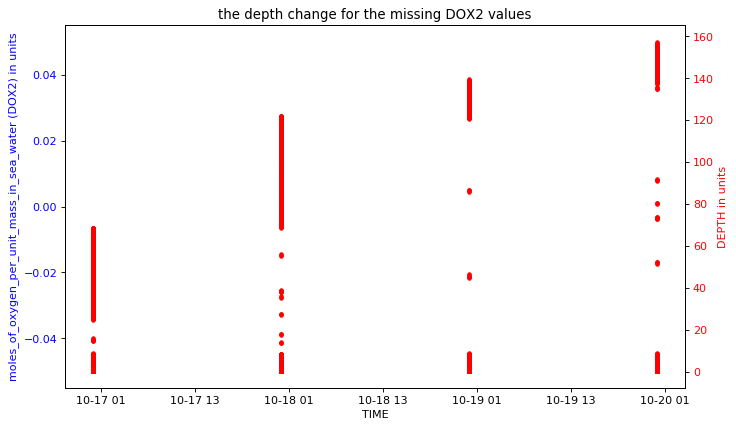

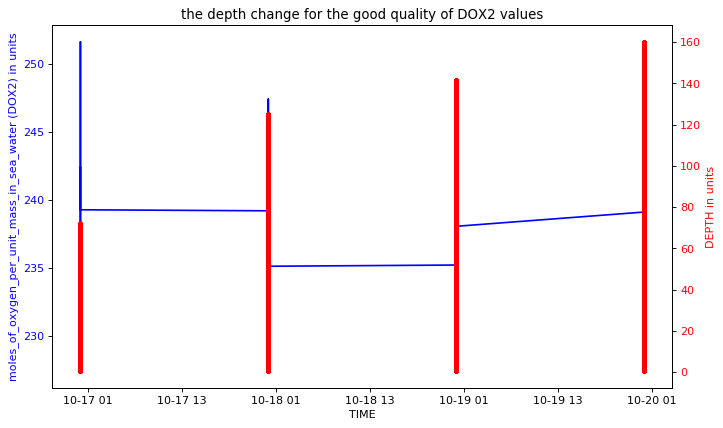

In [11]:
#DOX2:standard_name: moles_of_oxygen_per_unit_mass_in_sea_water
do2 = St_14.DOX2_quality_control.unique()
print('the quality type of DOX2 are',do2)
do2missing =St_14.loc[df['DOX2_quality_control'] == 9.]
print('the number of missing data for DOX2',len(do2missing),', and the pecentage is',round(len(do2missing)/len(St_14),2)*100,'%')


#### imputation the data
# Extract variable values and convert the time values into an array of datetime objects
TIME = pd.to_datetime(do2missing['TIME']).dt.date.values
do2Data = do2missing['DOX2'].values
depthData = do2missing['DEPTH'].values

# plot depth and DOX2 missing value timeseries
figure1 = figure( figsize=(10,6 ), dpi=80, facecolor='w', edgecolor='k')

ax1 = figure1.add_subplot(111)
ax1.plot(TIME,do2Data, 'b-')
ax1.set_xlabel('TIME')
ax1.set_title('the depth change for the missing DOX2 values')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('moles_of_oxygen_per_unit_mass_in_sea_water (DOX2)' + ' in units', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(TIME,depthData, 'r.')
ax2.set_ylabel('DEPTH' + ' in units', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
    

# good quality DOX2
do2Valid=St_14.loc[df['DOX2_quality_control'] != 9.]
TIME = pd.to_datetime(do2Valid['TIME']).dt.date.values
do2vData = do2Valid['DOX2'].values
depthvData = do2Valid['DEPTH'].values

# plot depth and DOX2 good quality data timeseries
figure2 = figure( figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

ax3 = figure2.add_subplot(111)
ax3.plot(TIME,do2vData, 'b-')
ax3.set_xlabel('TIME')
ax3.set_title('the depth change for the good quality of DOX2 values')
# Make the y-axis label and tick labels match the line color.
ax3.set_ylabel('moles_of_oxygen_per_unit_mass_in_sea_water (DOX2)' + ' in units', color='b')
for t3 in ax3.get_yticklabels():
    t3.set_color('b')

ax4 = ax3.twinx()
ax4.plot(TIME,depthvData, 'r.')
ax4.set_ylabel('DEPTH' + ' in units', color='r')
for t4 in ax4.get_yticklabels():
    t4.set_color('r')

show()

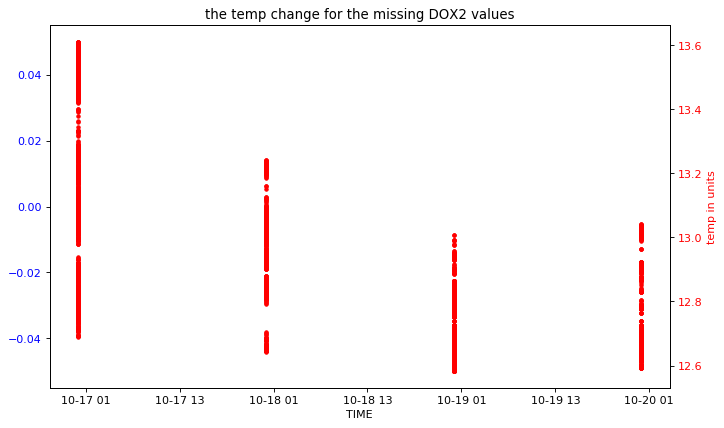

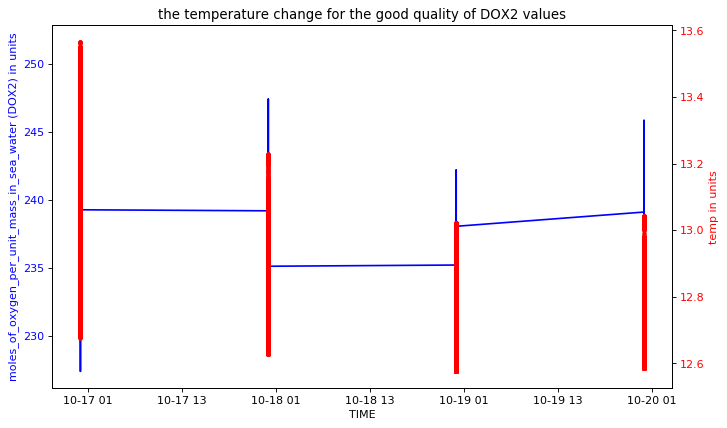

In [12]:
#### missing on the way
#### which is a random missing value
# Extract variable values and convert the time values into an array of datetime objects
TIME = pd.to_datetime(do2missing['TIME']).dt.date.values
do2Data = do2missing['DOX2'].values
tempData = do2missing['TEMP'].values

# plot depth and DOX2 missing value timeseries
figure3 = figure( figsize=(10,6 ), dpi=80, facecolor='w', edgecolor='k')

ax5 = figure3.add_subplot(111)
ax5.plot(TIME,do2Data, 'b-')
ax5.set_xlabel('TIME')
ax5.set_title('the temp change for the missing DOX2 values')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('moles_of_oxygen_per_unit_mass_in_sea_water (DOX2)' + ' in units', color='b')
for tl in ax5.get_yticklabels():
    tl.set_color('b')

ax6 = ax5.twinx()
ax6.plot(TIME,tempData, 'r.')
ax6.set_ylabel('temp' + ' in units', color='r')
ax2.set_ylabel('TEMP' + ' in units', color='r')
for tl in ax6.get_yticklabels():
    tl.set_color('r')
    

# good quality DOX2
do2Valid=St_14.loc[df['DOX2_quality_control'] != 9.]
TIME = pd.to_datetime(do2Valid['TIME']).dt.date.values
do2vData = do2Valid['DOX2'].values
tempvData = do2Valid['TEMP'].values

# plot depth and DOX2 good quality data timeseries
figure4 = figure( figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

ax6 = figure4.add_subplot(111)
ax6.plot(TIME,do2vData, 'b-')
ax6.set_xlabel('TIME')
ax6.set_title('the temperature change for the good quality of DOX2 values')
# Make the y-axis label and tick labels match the line color.
ax6.set_ylabel('moles_of_oxygen_per_unit_mass_in_sea_water (DOX2)' + ' in units', color='b')
for t3 in ax6.get_yticklabels():
    t3.set_color('b')

ax7 = ax6.twinx()
ax7.plot(TIME,tempvData, 'r.')
ax7.set_ylabel('temp' + ' in units', color='r')
for t4 in ax7.get_yticklabels():
    t4.set_color('r')

show()

In [13]:
# corr plot for each variable, select those with corr>0.5 as training features
corr = do2Valid.corr() 
corr[(corr.abs()>0.5) & (corr.abs() < 1.0)].style.background_gradient(cmap='coolwarm')

D:\2018 UNSW\python-download\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [14]:
#imputation data

# Train-test split

X = do2Valid[['PRES','DEPTH','PROFILE','TEMP','PSAL','DOX1','CPHL','CDOM']]
# Target value
y = do2Valid['DOX2'].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Import knn 
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)

# Fit the classifier to the data
model = knn.fit(X_train,y_train.astype('int'))
y_pred = knn.predict(X_test)

# Test the accuracy score of the model
from sklearn.metrics import accuracy_score
print('the accuracy of testing data on DOX2 is:',accuracy_score(y_test.astype('int'), y_pred))

the accuracy of testing data on DOX2 is: 0.9186733763382755


In [16]:
missing_dox2= do2missing['DOX2']
#predict the DOX2 value for the whole St_14 dataset
df_missing_dox2 = pd.DataFrame(St_14[['PRES','DEPTH','PROFILE','TEMP','PSAL','DOX1','CPHL','CDOM']])
imputed_dox2 = model.predict(df_missing_dox2)
print('the array of knn prediction:',imputed_dox2)

the array of knn prediction: [243 243 243 ... 237 237 237]


In [17]:
indicies_of_missing = St_14[St_14['DOX2'].isnull()].index # list of the missing indices
St_14.head(5)
for fill_index, dataframe_index in enumerate(indicies_of_missing):
    if pd.isnull(St_14.loc[dataframe_index, 'DOX2']):
        St_14.loc[dataframe_index,'DOX2'] = imputed_dox2[fill_index]
    else:
        continue

In [18]:
print("the number of missing DOX2 after imputation is", St_14['DOX2'].isnull().sum())

the number of missing DOX2 after imputation is 0


In [19]:
#do similar for VBSC  
#VBSC: quality control flag for volume_scattering_function
vbQ =St_14.VBSC_quality_control.unique() 
print('the unique quality control type for VBSC is:', vbQ)

### 0 is no QC performed that we will still leave it there
### 4 is the bad data 
vbscBad = St_14.loc[df['VBSC_quality_control'] == 4.]
print("the ratio of bad quality data v.s.good quality is",round(len(vbscBad)/(len(St_14)-len(vbscBad)),3))

##can be deleted 


##----- update St_14-----###
St_14 = St_14[(St_14['VBSC_quality_control'] != 4.)]

the unique quality control type for VBSC is: [4. 0. 1.]
the ratio of bad quality data v.s.good quality is 0.042


In [20]:
#irrade 45% bad
#quality control flag for downwelling_spectral_irradiance_in_sea_water_beam1

ir4Q = St_14.IRRAD443_quality_control.unique()
print('type of IRRAD443 is',ir4Q) 

ir4bad=St_14.loc[df['IRRAD443_quality_control'] == 4.]
print('the number of bad data for IRRAD443',len(ir4bad),', and the pecentage is',round(len(ir4bad)/len(St_14),4)*100,'%')


type of IRRAD443 is [4. 1.]
the number of bad data for IRRAD443 80281 , and the pecentage is 52.839999999999996 %


In [23]:
ir9Q = St_14.IRRAD490_quality_control.unique()
print('type of IRRAD490',ir9Q) 
ir5Q = St_14.IRRAD555_quality_control.unique()
print('type of IRRAD555',ir5Q) 
ir6Q = St_14.IRRAD670_quality_control.unique()
print('type of IRRAD670',ir6Q) 
ir6bad=St_14.loc[df['IRRAD670_quality_control'] == 4.]
print('the number of bad data for IRRAD670',len(ir6bad),', and the pecentage is',round(len(ir6bad)/len(St_14),4)*100,'%')

type of IRRAD490 [4. 1.]
type of IRRAD555 [4. 1.]
type of IRRAD670 [4. 1.]
the number of bad data for IRRAD670 80366 , and the pecentage is 52.89 %


In [25]:
del St_14['NTRA_quality_control']
del St_14['UCUR_quality_control']
del St_14['VCUR_quality_control']
#UCUR can only be calculated when the glider is close to the surface and gets an updated GPS fix
#THus UCUR_GPSand VCUR_GPS null value can be deleted

del St_14['UCUR_GPS']
del St_14['UCUR_GPS_quality_control']
del St_14['VCUR_GPS']
del St_14['VCUR_GPS_quality_control']
print(St_14.isnull().sum())

FID                            0
file_id                        0
deployment_name                0
platform_type                  0
platform_code                  0
time_coverage_start            0
time_coverage_end              0
TIME                           0
TIME_quality_control           0
LATITUDE                       0
LATITUDE_quality_control       0
LONGITUDE                      0
LONGITUDE_quality_control      0
PRES                           0
PRES_quality_control           0
DEPTH                          0
DEPTH_quality_control          0
PROFILE                        0
PROFILE_quality_control        0
PHASE                          0
PHASE_quality_control          0
TEMP                           0
TEMP_quality_control           0
PSAL                           0
PSAL_quality_control           0
DOX1                           0
DOX1_quality_control           0
DOX2                           0
DOX2_quality_control           0
CPHL                           0
CPHL_quali

In [28]:
#HEAD:TIME LATITUDE LONGITUDE


heQ = St_14.HEAD_quality_control.unique()
print('type of HEAD',heQ)
hemissing=St_14.loc[df['HEAD_quality_control'] == 9.]
print('the number of missing data for HEAD',len(hemissing),', and the pecentage is',round(len(hemissing)/len(St_14),4)*100,'%')
#update St_14
St_14 = St_14[(St_14['HEAD_quality_control'] != 9.)]

type of HEAD [0. 9.]
the number of missing data for HEAD 161 , and the pecentage is 0.11 %


In [21]:
St_14_withBad = St_14
St_14_good = St_14[(St_14['IRRAD443_quality_control'] != 4.)]

151937